In [1]:
import xarray as xr
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs
from cartopy import feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import netCDF4 as nc

In [2]:
fn = '/network/rit/lab/vuillelab_rit/sturner/data/model/ldas/GLDASp5_elevation_025d.nc4'
fd = '/network/rit/lab/vuillelab_rit/sturner/data/model/ldas/ldas_elev.nc4'
ds = xr.open_dataset(fn)
da = xr.open_dataset(fd)

In [3]:
ds

<xarray.Dataset>
Dimensions:          (lon: 1440, lat: 600, time: 1, bnds: 2)
Coordinates:
  * lon              (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * lat              (lat) float32 -59.88 -59.62 -59.38 ... 89.38 89.62 89.88
  * time             (time) datetime64[ns] 2000-01-01
Dimensions without coordinates: bnds
Data variables:
    time_bnds        (time, bnds) datetime64[ns] ...
    GLDAS_elevation  (time, lat, lon) float32 ...
Attributes: (12/13)
    missing_value:          -9999.0
    time_definition:        constant
    title:                  GLDAS p5 data
    institution:            NASA GSFC
    history:                created on date: Wed Oct  7 00:55:12 2020
    references:             Rodell_etal_BAMS_2004,Kumar_etal_EMS_2006,Peters-...
    ...                     ...
    website:                https://ldas.gsfc.nasa.gov/gldas/, https://lis.gs...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  -59.875
    SOUTH_WEST_CORNER_LON:  -179.875
    DX:                     0.25
    DY:                     0.25

In [4]:
lon = ds['lon']
lat = ds['lat']
xv, yv = np.meshgrid(lon, lat, indexing='ij')

In [5]:
data = [['  Antisana', -0.48, -78.15], ['  Artesonraju', -8.95, -77.45], ['  QIC', -13.93, -70.85], ['  Zongo', -16.25, -68.16]]

pts = pd.DataFrame(data, columns=['Location', 'Latitude', 'Longitude'])

stid = pts.Location
plat = pts.Latitude
plon = pts.Longitude

In [6]:
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

In [7]:
nc = NetCDFFile(fn)

lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
elev = nc.variables['GLDAS_elevation'][:]

AttributeError: 'Basemap' object has no attribute 'gridlines'

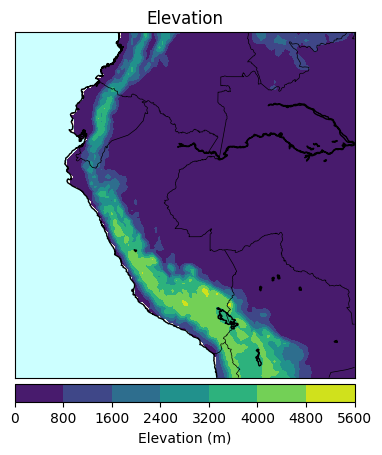

In [8]:
latN = 5
latS = -20
lonW = -85
lonE = -60
cLat = (latN + latS)/2
cLon = (lonW + lonE )/2

map = Basemap(projection='merc',llcrnrlon=-85.,llcrnrlat=-20.,urcrnrlon=-60.,urcrnrlat=5.,resolution='i') 
map.drawcoastlines()
map.drawcountries()
map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF')
lons,lats= np.meshgrid(lon,lat) 
x,y = map(lons,lats)
topo = map.contourf(x,y,elev[0,:,:])
cb = map.colorbar(topo,"bottom", size="5%", pad="2%")
plt.title('Elevation')
cb.set_label('Elevation (m)')
gl = map.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.xlines = False
#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.ylocator = mticker.FixedLocator([-15, -10, -5, 0])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}
for count, site in enumerate(stid):
    ax.text(plon[count],plat[count],stid,horizontalalignment='left',transform=ccrs.PlateCarree(),fontsize=15) 

ValueError: x and y must be the same size

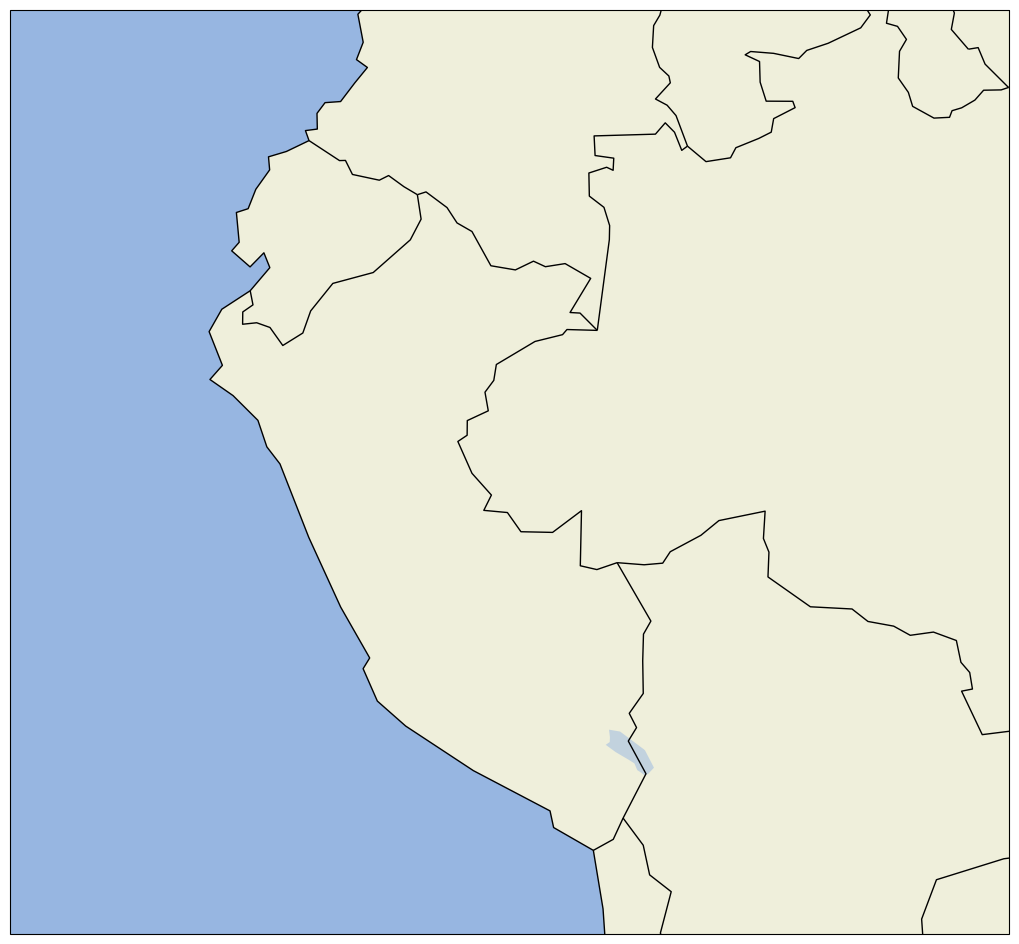

In [9]:
res = '110m'
proj = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(1,1,1, projection=proj)
ax.set_extent ([lonW,lonE,latS,latN])
ax.add_feature (cfeature.LAND.with_scale(res))
ax.add_feature (cfeature.OCEAN.with_scale(res))
ax.add_feature(cfeature.COASTLINE.with_scale(res))
ax.add_feature (cfeature.LAKES.with_scale(res), alpha = 0.5)
ax.add_feature (cfeature.BORDERS.with_scale(res))
#ax.set_title ('Tropical Alpine Glacier Locations of Interest')
ax.scatter(lon,lat,s=72,c='b',edgecolor='black',alpha=0.75, transform=ccrs.PlateCarree());
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.xlines = False
#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.ylocator = mticker.FixedLocator([-15, -10, -5, 0])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}
for count, site in enumerate(stid):
    ax.text(lon[count],lat[count],site,horizontalalignment='left',transform=ccrs.PlateCarree(),fontsize=15) 

In [10]:
lat = nc.variables['lat'][(0,5)]
#lon = nc.variables['lon'][:]
print(lat)

ValueError: slicing expression exceeds the number of dimensions of the variable

In [11]:
nc = NetCDFFile(fd)

lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
elev = nc.variables['GLDAS_elevation'][:]

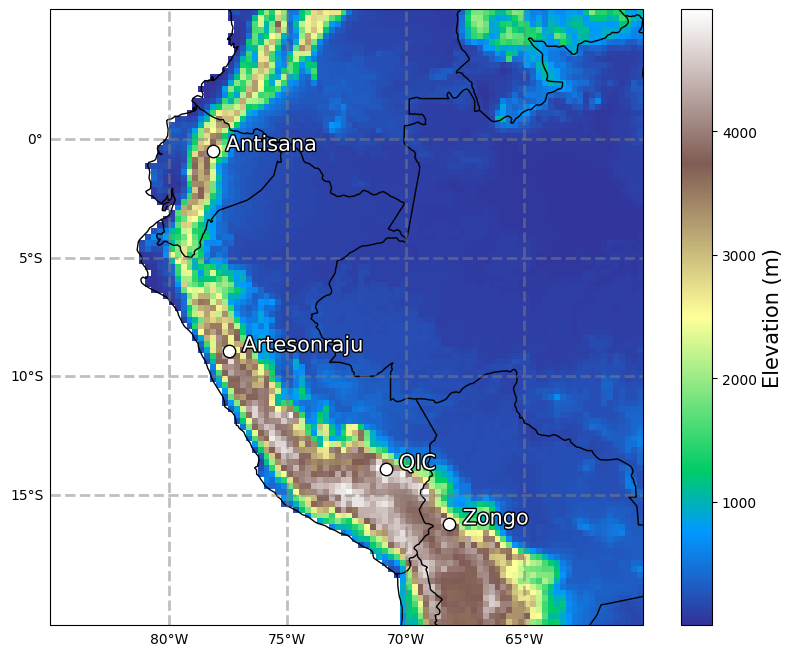

In [13]:
import cartopy.feature as cfeat
from matplotlib import colors
import matplotlib.patheffects as PathEffects
colormap = plt.cm.get_cmap('terrain') #gist_earth
proj = ccrs.PlateCarree()
fig,axs = plt.subplots(1,1,figsize=(10, 8),subplot_kw={'projection':proj})

oreo=axs.pcolormesh(lon,lat,elev[0,:,:],shading='auto', cmap=colormap)

axs.add_feature(cfeat.COASTLINE.with_scale('50m'))
axs.add_feature(cfeat.BORDERS)

gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlines = True
gl.ylocator = mticker.FixedLocator([-65, -70, -75, -80])
gl.ylocator = mticker.FixedLocator([-15, -10, -5, 0])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.xlabel_style = {'size': 15, 'color': 'gray'}
#gl.ylabel_style = {'size': 15, 'color': 'gray'}

axs.scatter(plon,plat,s=80,c='white',edgecolor='black',alpha=1, transform=ccrs.PlateCarree());
for count, site in enumerate(stid):
    axs.text(plon[count],plat[count],site,horizontalalignment='left',transform=ccrs.PlateCarree(),fontsize=15, c='white').set_path_effects([PathEffects.withStroke(linewidth=2, foreground='black')])  
    
#plt.title('Change in FLH from 1980 to 2015 (MERRA2)')
cb = plt.colorbar(oreo,orientation="vertical", label='Elevation (m)');
cb.set_label(label='Elevation (m)',size=15)

plt.savefig('fig1.svg', format='svg')